In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
python(79318) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [3]:
ticker = input('Write ticker: ')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-18,0.379711,0.380862,0.370915,0.370965,0.370965,927786270
2022-08-19,0.370969,0.370969,0.333806,0.335049,0.335049,1645536381
2022-08-20,0.335020,0.342383,0.333622,0.337541,0.337541,848212364
2022-08-21,0.337475,0.348167,0.336499,0.345302,0.345302,835616993
2022-08-22,0.345282,0.345282,0.332524,0.344721,0.344721,1001511240
...,...,...,...,...,...,...
2024-08-12,0.552931,0.579069,0.552163,0.568768,0.568768,1479740403
2024-08-13,0.568768,0.583113,0.563872,0.576399,0.576399,1245896255
2024-08-14,0.576408,0.581889,0.566226,0.569192,0.569192,1138569808


In [4]:
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


In [5]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-18,0.379711,0.380862,0.370915,0.370965,0.370965,927786270
2022-08-19,0.370969,0.370969,0.333806,0.335049,0.335049,1645536381
2022-08-20,0.335020,0.342383,0.333622,0.337541,0.337541,848212364
2022-08-21,0.337475,0.348167,0.336499,0.345302,0.345302,835616993
2022-08-22,0.345282,0.345282,0.332524,0.344721,0.344721,1001511240


In [6]:
fig = px.line(data_frame = stock_data, x=stock_data.index, y='Close', title= 'Stock market line plot')
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
figure = go.Figure(data=[go.Candlestick(x=stock_data.index, open=stock_data['Open'], high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])])
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [8]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data):
    macd = ta.macd(close=stock_data['Close'], length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
stock_data['MACD'] = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis



,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD
Date,,,,,,,,,,
2024-08-03,0.560771,0.576546,0.542472,0.556391,0.556391,1325726393,47.501031,0.001832,1.066425,0.931552
2024-08-04,0.556390,0.558306,0.516428,0.523396,0.523396,1209933394,40.883571,0.001596,1.127907,0.577305
2024-08-05,0.523396,0.525283,0.433492,0.489466,0.489466,4193893853,35.419119,0.016709,1.573630,0.145626
2024-08-06,0.489458,0.518503,0.489296,0.505697,0.505697,1747524592,39.579456,0.001269,1.500224,-0.125715
2024-08-07,0.505691,0.640819,0.494230,0.600810,0.600810,4286385926,57.043151,0.022259,2.346023,0.071465
2024-08-08,0.600849,0.641619,0.580908,0.617577,0.617577,3502679662,59.277675,0.004649,2.462743,0.295973
2024-08-09,0.617580,0.623707,0.569023,0.581153,0.581153,2024450473,52.846563,0.002782,2.524198,0.310197
2024-08-10,0.581151,0.601367,0.579598,0.585579,0.585579,1134054567,53.506639,0.000657,2.324980,0.335481
2024-08-11,0.585586,0.593077,0.547541,0.552932,0.552932,1202704291,48.152215,0.001919,2.325047,0.209437


In [9]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']


In [10]:
fig = go.Figure()

# Add the price chart (default)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price'))

# Add the RSI chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI', visible=False))

# Add the MACD chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', visible=False))

# Add the Bollinger Bands chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=False, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=False, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=False, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=False, line=dict(color='black')))

# Define the buttons for dropdown menu
buttons = [
    dict(label='Price', method='update', args=[{'visible': [True, False, False, False, False, False, False]}, {'title': 'Stock market line plot in USD'}]),
    dict(label='RSI', method='update', args=[{'visible': [False, True, False, False, False, False, False]}, {'title': 'RSI Indicator'}]),
    dict(label='MACD', method='update', args=[{'visible': [False, False, True, False, False, False, False]}, {'title': 'MACD Indicator'}]),
    dict(label='Bollinger Bands', method='update', args=[{'visible': [False, False, False, True, True, True, True]}, {'title': 'Bollinger Bands'}])
]

# Create the dropdown menu
dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    xanchor='left',
    yanchor='top',
    x=0.1,
    y=1.1
)

# Update layout to include dropdown menu and other customizations
fig.update_layout(
    updatemenus=[dropdown],
    plot_bgcolor='lightgray',   # Background color of the plotting area
    font=dict(family='Arial', size=12),
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Count',
    hoverlabel=dict(bgcolor='lightgrey', font_size=14),
    margin=dict(l=100, r=100, t=100, b=100),
    showlegend=True
)

# Show the figure
fig.show()


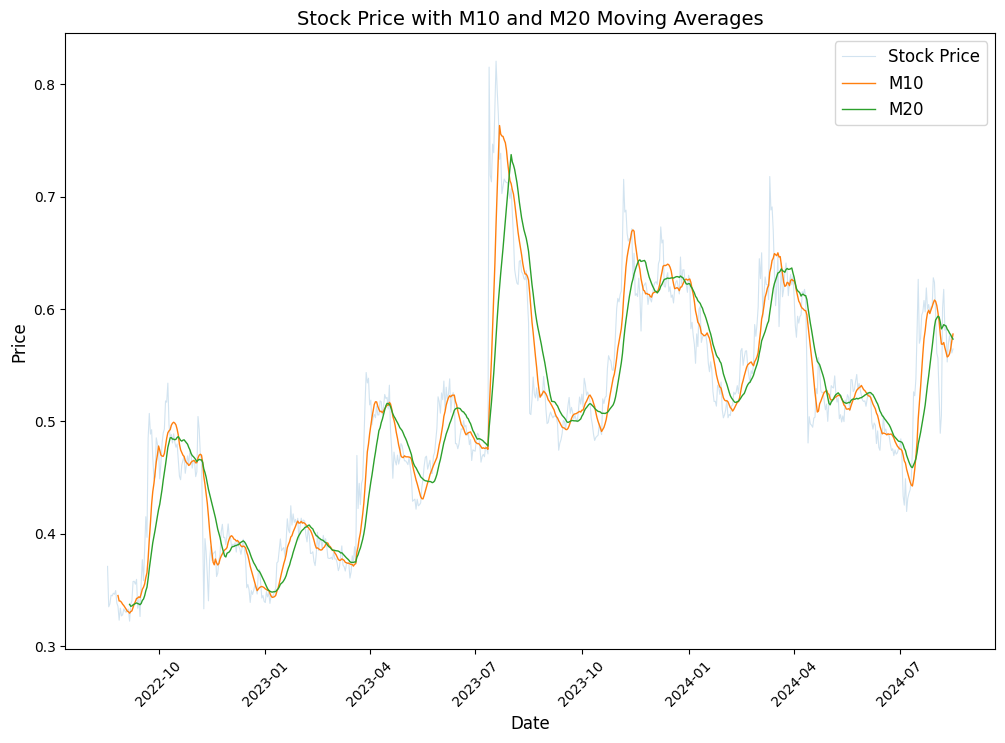

In [11]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Machine Learning Models

In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

2024-08-17 12:17:33.191800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'Garman',
       'ATR', 'MACD', 'M10', 'M20', 'SD', 'UB', 'LB'],
      dtype='object')

In [14]:
X = stock_data[['Open', 'High', 'Low', 'Volume']].to_numpy()
y = stock_data['Close'].to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()     

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,931 (792.70 KB)

 Trainable params: 202,931 (792.70 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=30)

Epoch 1/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0223 - val_loss: 1.3698e-04
Epoch 2/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9853e-04 - val_loss: 2.5274e-04
Epoch 3/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4551e-04 - val_loss: 2.5547e-04
Epoch 4/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5751e-04 - val_loss: 1.1994e-04
Epoch 5/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3459e-04 - val_loss: 3.8973e-04
Epoch 6/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1279e-04 - val_loss: 1.2218e-04
Epoch 7/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5798e-04 - val_loss: 1.1368e-04
Epoch 8/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7296e-04 - val_loss: 8.6500e-05
Epoch 9/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2341e-04 - val_loss: 1.4261e-04
Epoch 10/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7310e-04 - val_loss: 5.3951e-05
Epoch 11/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.

<Axes: >

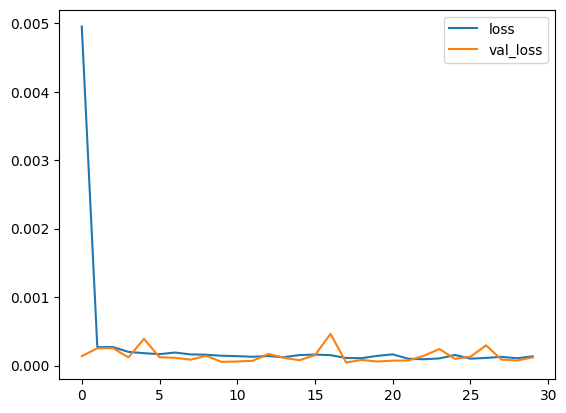

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
features = stock_data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
features_scaled = scaler.transform(features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Making a prediction
prediction = model.predict(features_scaled)
print(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
[[0.57207835]]


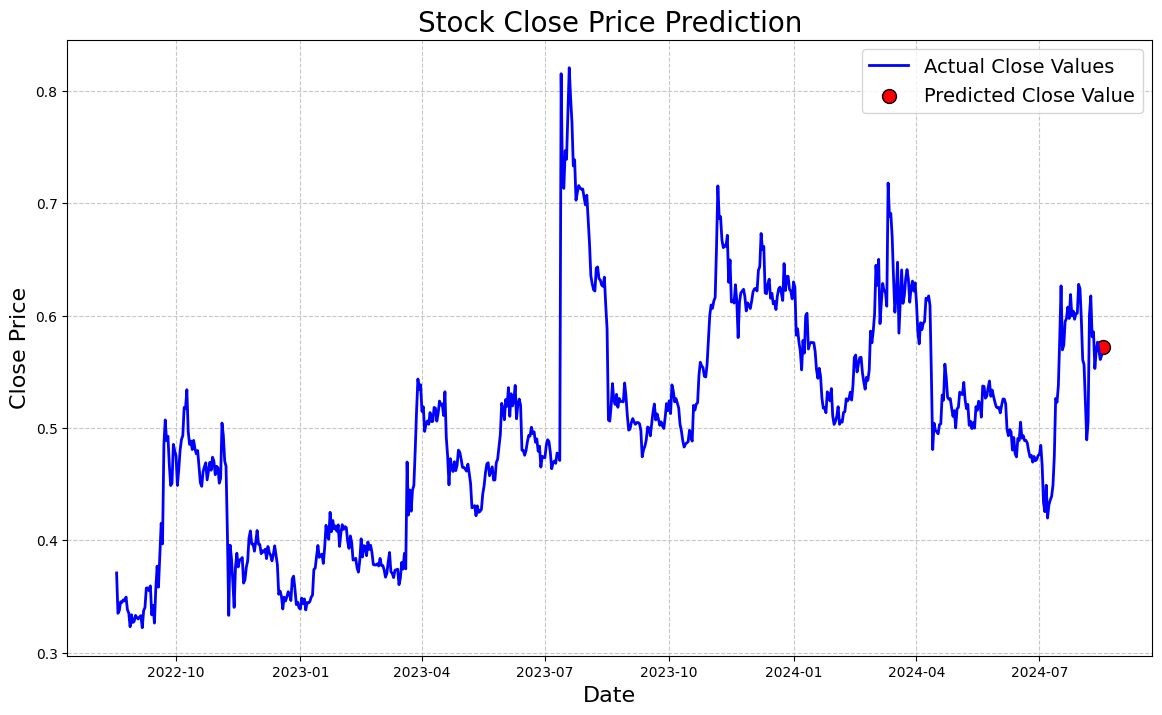

In [19]:
plt.figure(figsize=(14, 8))

# Plotting the actual close values
plt.plot(stock_data.index, stock_data['Close'], label='Actual Close Values', color='blue', linewidth=2)

# Plotting the predicted value
plt.scatter(stock_data.index[-1] + pd.DateOffset(1), prediction, color='red', label='Predicted Close Value', s=100, edgecolors='black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Adding titles and labels with larger font sizes
plt.title('Stock Close Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)

# Adding a legend with a larger font size
plt.legend(fontsize=14)

# Display the plot
plt.show()

In [20]:
forecast_data = stock_data.reset_index().rename(columns={"Date": "ds", "Close": "y"})


In [21]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=720)
predictions = model.predict(forecasts)
fig_forecast = plot_plotly(model, predictions)
fig_forecast.update_layout(title='Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
fig_forecast.show()


12:18:56 - cmdstanpy - INFO - Chain [1] start processing
python(79430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
12:18:56 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(400)

print(predicted_prices)

12:18:57 - cmdstanpy - INFO - Chain [1] start processing
python(79434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
12:18:57 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat
360 2023-08-13  0.558537
361 2023-08-14  0.562138
362 2023-08-15  0.562223
363 2023-08-16  0.562510
364 2023-08-17  0.564149
..         ...       ...
755 2024-09-11  0.515256
756 2024-09-12  0.516406
757 2024-09-13  0.514957
758 2024-09-14  0.512980
759 2024-09-15  0.510911

[400 rows x 2 columns]


In [23]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(700)

trace1 = go.Scatter(x=forecast_data['ds'], y=forecast_data['y'], mode='lines+markers', name='Historical Data', marker=dict(color='blue'))

trace2 = go.Scatter(x=predicted_prices['ds'], y=predicted_prices['yhat'], mode='lines+markers', name='Predicted Prices', marker=dict(color='red'))

layout = go.Layout(
    title='Historical and Predicted Prices for BTC-USD',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    legend=dict(x=0.7, y=1),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

12:18:58 - cmdstanpy - INFO - Chain [1] start processing
python(79435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
12:18:58 - cmdstanpy - INFO - Chain [1] done processing
